<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/Model_WithKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf 
import pickle
from sklearn.externals import joblib
import numpy as np
from tensorflow.python.client import device_lib
from tensorflow.saved_model import simple_save
import random
import matplotlib.pyplot as plt 
import math
from sklearn.model_selection import train_test_split
from tensorflow.python import pywrap_tensorflow

The labels and Features files for the model have been listed in the repository to be included here. 

In [0]:
 
with open('/content/featuresFinal_withNOV.bin','rb') as file:
  f = pickle.load(file)
  
with open('/content/labelsFinal_withNOV.bin','rb') as file:
  l = pickle.load(file)

In [0]:
features = []
labels = []

for i in f:
  features.append(list(map(float,i)))
for i in l:
  labels.append(list(map(float,i)))

In [5]:
print(np.shape(features))
print(np.shape(labels))

(2753, 10)
(2753, 1)


In [0]:
x_train_t, x_test_t,y_train_t, y_test_t = train_test_split(features, labels, test_size = 0.3)

In [0]:
tf.reset_default_graph()


In [0]:
print(device_lib.list_local_devices())



In [0]:
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(15, input_shape = (10, ), activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(1,  activation = 'relu'))

In [0]:
model.compile(optimizer = Adam(lr = 0.001),loss='mse')
model.summary()

In [0]:
hist = model.fit([x_train_t], [y_train_t], validation_split = 0.33, epochs = 200,verbose = 1, batch_size = 32, shuffle = True)

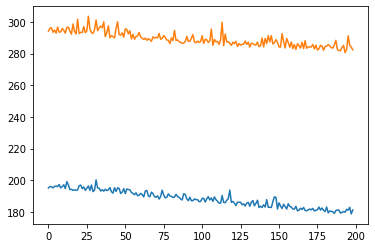

In [19]:
##Plotting the learning curve 

tr = hist.history['loss']
val_ls = hist.history['val_loss']
plt.plot(tr[1:])
plt.plot(val_ls[1:])

In [20]:
##Estimating the Root Mean Square Error of the Model - A metric of its performance

predicted = model.predict([x_test_t])
y_test_t=np.reshape(y_test_t, (np.shape(y_test_t)[0],1))

actual =[]
pred=[]
se=0
show = np.hstack((y_test_t, predicted))

for i in show:
  se+=(i[0]-i[1])**2
  actual.append(i[0])
  pred.append(i[1])
  
rmse = (se/np.size(y_test_t))**0.5
print(rmse)

16.411977516900837


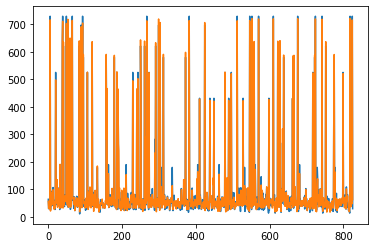

In [21]:
plt.plot(actual)
plt.plot(pred)